<a href="https://colab.research.google.com/github/Vaidehiiii/Uber-Data-Analysis---cc/blob/main/UBER-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaidehi Pawar

CODE CLAUSE INTERNSHIP

# Uber Data Analysis
In this project, we will answer the following question:


1. What is the month we have the most clients?

2. What is the day we have the most client?

3. What is the hour we have the most clients?

4. What is the category that brings us the most clients?

5. What is the most frequent trip's purpose?

6. What is the most frequent starting place for our trips?

7. What is the most frequent ending place for our trips?

8. What is the mean of miles for each trip purpose?

9. What is the mean of miles for each trip category?

10. What is the mean of miles for each ending trip point?

11. What is the mean of miles for each starting trip point?



In [1]:
# Constants
DATAPATH = "UBER_DATA_ANALYSIS.csv"

In [2]:
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
row_data = pd.read_csv(DATAPATH)
df = row_data.copy()
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Assessing** **Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


**Data Clean**

In [6]:
# We will begin by replacing the missing values of the purpose column with the word unknown
df['PURPOSE*'].fillna("Unknown", inplace = True)

In [7]:
# Correct the format of the DateTime columns
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [8]:
# Separating the START_DATE* column into the month, day, and hour columns
df['Start_Month'] = df['START_DATE*'].dt.month_name()
df['Start_Day'] = df['START_DATE*'].dt.day_name()
df['Start_Hour'] = df['START_DATE*'].dt.hour

In [9]:
# calculating the Trip Duration
df["Trip_Duration"] = df['END_DATE*'] - df['START_DATE*']

In [10]:
# Dropping the useless columns
df.drop({'START_DATE*', 'END_DATE*'}, axis = 1)

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Month,Start_Day,Start_Hour,Trip_Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21,0 days 00:06:00
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1,0 days 00:12:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20,0 days 00:13:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17,0 days 00:14:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,0 days 01:07:00
...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,December,Saturday,1,0 days 00:07:00
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,December,Saturday,13,0 days 00:18:00
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,December,Saturday,15,0 days 00:35:00
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,December,Saturday,21,0 days 00:18:00



**Data Analysis **

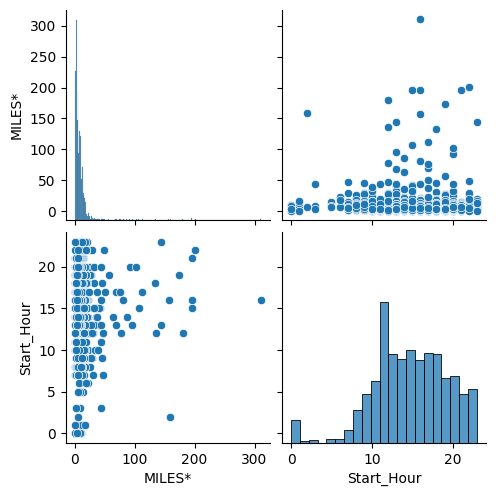

In [11]:
sns.pairplot(df)

**What is the month we have the most clients?**

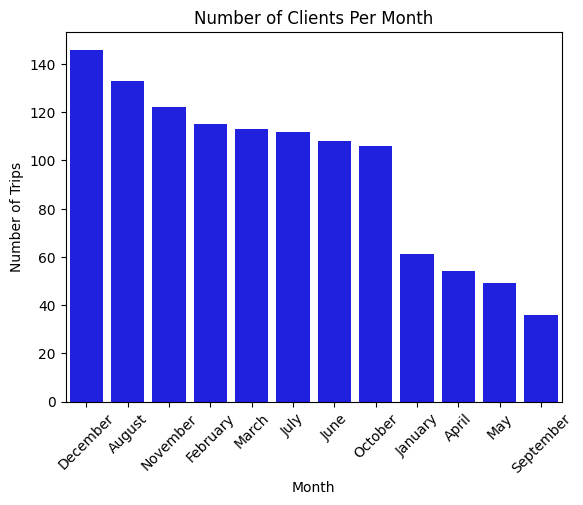

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(data=df, x='Start_Month', order=df['Start_Month'].value_counts().index, color='blue')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Month")
plt.xticks(rotation=45)

plt.show()


**What is the day we have the most clients?**

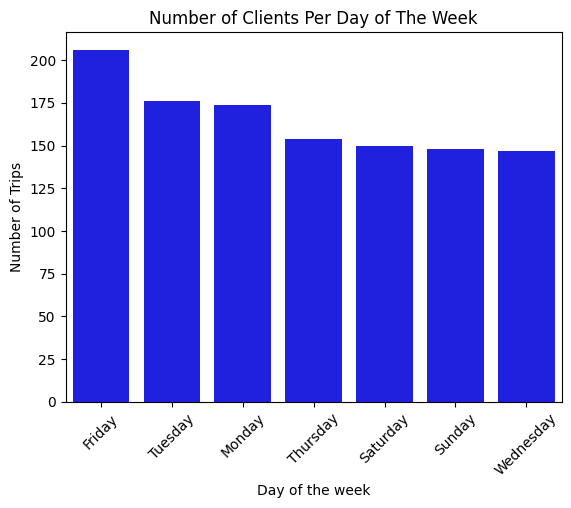

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(data=df, x='Start_Day', order=df['Start_Day'].value_counts().index.tolist(), color='blue')
plt.xlabel("Day of the week")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Day of The Week")
plt.xticks(rotation=45)

plt.show()


**What is the hour we have the most clients?**

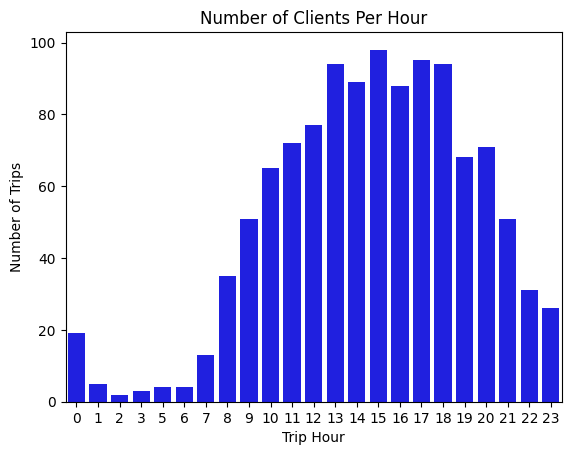

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sorted_hours = df['Start_Hour'].value_counts().sort_index()  # Sorting the counts by hour
sns.countplot(data=df, x='Start_Hour', order=sorted_hours.index, color='blue')
plt.xlabel("Trip Hour")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Hour")

plt.show()


**What is the category that brings us the most clients?**

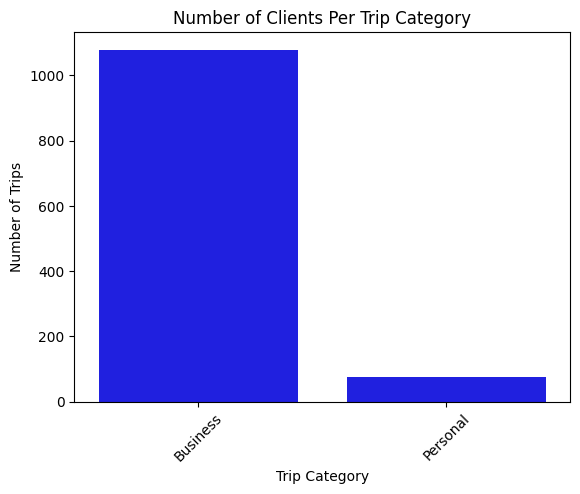

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Make sure you've imported pandas

# Assuming df is your DataFrame
sns.countplot(data=df, x='CATEGORY*', order=pd.Series(df['CATEGORY*']).value_counts().index, color='blue')
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Trip Category")
plt.xticks(rotation=45)

plt.show()


**What is the most frequent trip's purpose?**

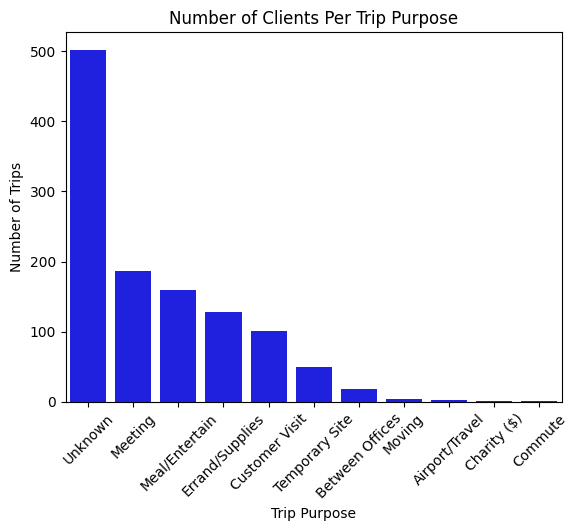

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
purpose_counts = df['PURPOSE*'].value_counts()
purpose_counts_df = pd.DataFrame({'Purpose': purpose_counts.index, 'Count': purpose_counts.values})

sns.barplot(data=purpose_counts_df, x='Purpose', y='Count', order=purpose_counts_df['Purpose'], color='blue')
plt.xlabel("Trip Purpose")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Trip Purpose")
plt.xticks(rotation=45)

plt.show()


**What is the most frequent starting place for our trips?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place')])

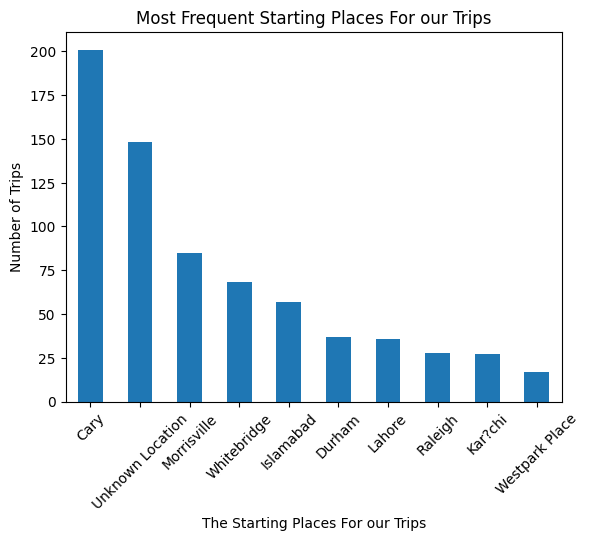

In [25]:
df['START*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Starting Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Starting Places For our Trips")
plt.xticks(rotation=45)

**What is the most frequent ending place for our trips?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex')])

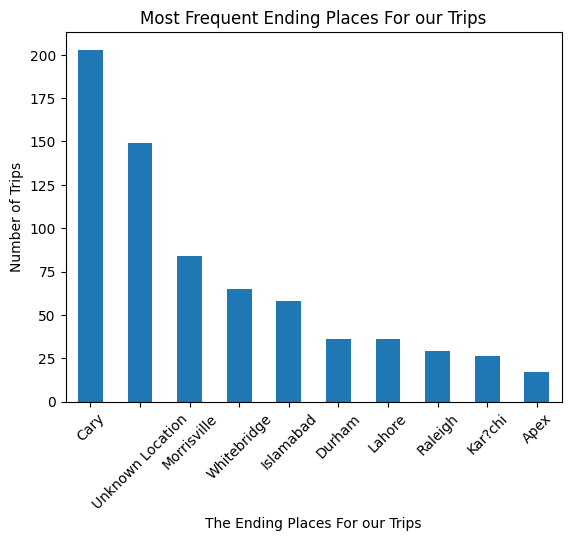

In [26]:
df['STOP*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Ending Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Ending Places For our Trips")
plt.xticks(rotation=45)

**What is the mean of miles for each trip purpose?**

Text(0.5, 1.0, 'The Mean of Miles for Each Purpose')

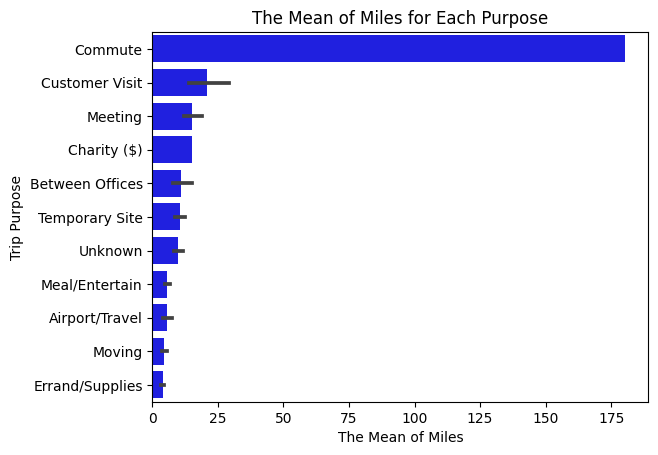

In [27]:
sns.barplot(x =df['MILES*'] , y= df['PURPOSE*'],
            order= df.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Purpose")
plt.title("The Mean of Miles for Each Purpose")

**What is the mean of miles for each trip category?**

Text(0.5, 1.0, 'The Mean of Miles for Each Category')

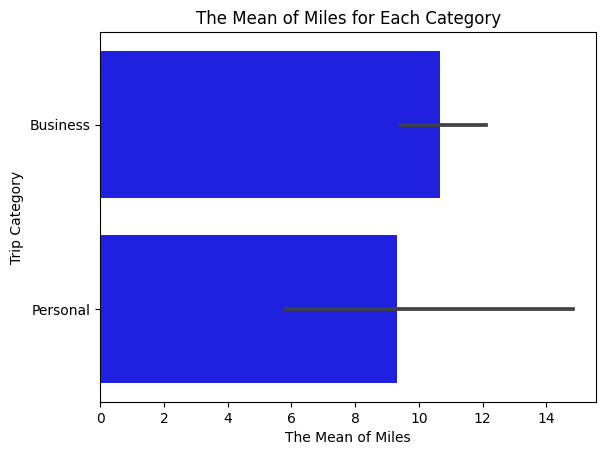

In [28]:
sns.barplot(x =df['MILES*'] , y= df['CATEGORY*'],
            order= df.groupby('CATEGORY*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Category")
plt.title("The Mean of Miles for Each Category")

**What is the mean of miles for each ending trip point?**

Text(0.5, 1.0, 'The Mean of Miles for Each Ending Point')

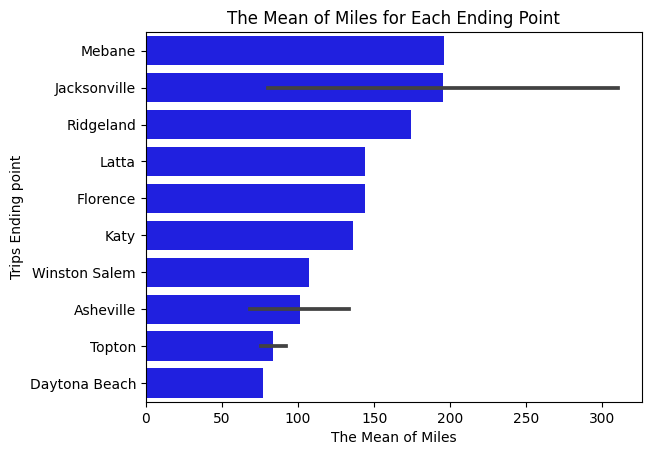

In [29]:
sns.barplot(x =df['MILES*'] , y= df['STOP*'],
            order= df.groupby('STOP*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Ending point")
plt.title("The Mean of Miles for Each Ending Point")

**What is the mean of miles for each starting trip point?**


Text(0.5, 1.0, 'The Mean of Miles for Each Starting Point')

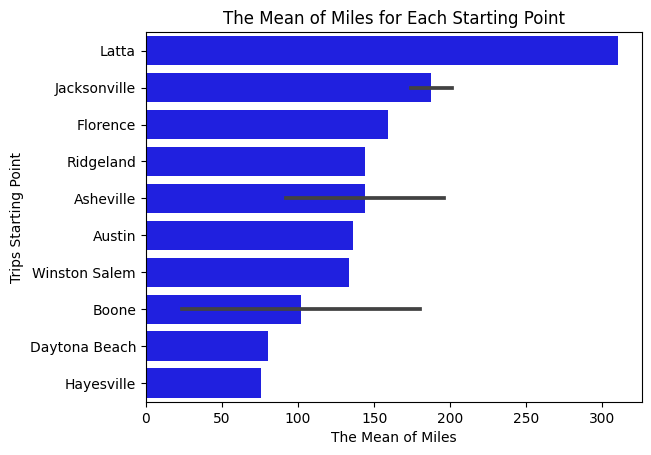

In [30]:
sns.barplot(x =df['MILES*'] , y= df['START*'],
            order= df.groupby('START*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Starting Point")
plt.title("The Mean of Miles for Each Starting Point")